In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from os import path
path = '/content/drive/MyDrive/csv/Shopping_CustomerData.csv'
df = pd.read_csv(path)

df.describe()


,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [4]:
df_new = df[["CustomerAge","SpendingScore"]]

In [5]:
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [6]:
df_new.isnull().sum()

CustomerAge      0
SpendingScore    0
dtype: int64

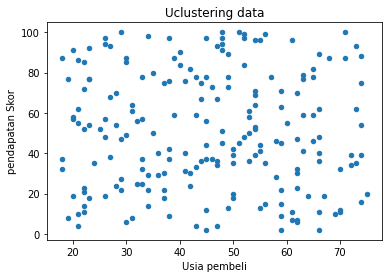

In [7]:
df.plot (kind='scatter',x='CustomerAge', y='SpendingScore')
#plt,scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.xlabel('Usia pembeli')
plt.ylabel('pendapatan Skor')
plt.title ('Uclustering data')
plt.show()

In [8]:
k = 3
np.random.seed(40)

random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(1.100), np.random.randint(1,100)])
  print('Randomly selected points as random_centroids:',random_centroids)                       

Randomly selected points as random_centroids: [[0, 71]]
Randomly selected points as random_centroids: [[0, 71], [0, 92]]
Randomly selected points as random_centroids: [[0, 71], [0, 92], [0, 8]]


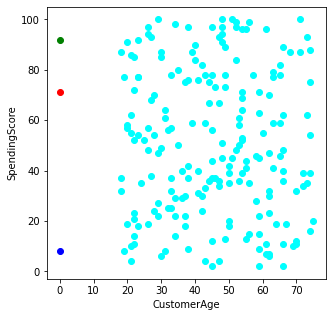

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()

In [10]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [11]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,CustomerAge,SpendingScore,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,49,78,49.497475,50.960769,85.445889,0,r
1,59,63,59.539903,65.741920,80.659779,0,r
2,54,69,54.037024,58.694122,81.467785,0,r
3,42,30,58.694122,74.886581,47.413078,2,b
4,30,6,71.589105,91.082380,30.066593,2,b


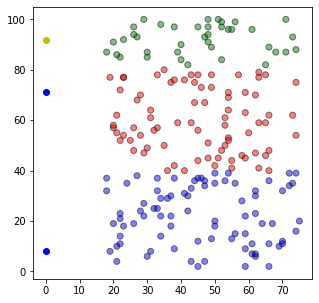

In [28]:


plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1], color = df_new['Color'],alpha = 0.5,edgecolor= 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

In [30]:


#step 3
#update data
#update centroid kepada titik yang baru
#update stage
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['CustomerAge'])
    random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['SpendingScore'])
  return parameter

random_centroids = update(random_centroids)
random_centroids


[[45.10126582278481, 59.962025316455694],
 [45.1025641025641, 92.02564102564102],
 [46.1219512195122, 22.134146341463413]]

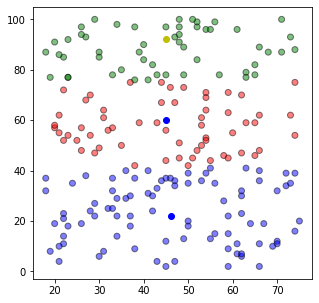

In [31]:
#step last
#mencari titik cendroid paling tepat
df_new = assignment(df_new, random_centroids)
df_new.head()
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()

In [33]:
#step
#update centroid sampai perhitungan mean berhenti

count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid', old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid' ,new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break


print(count)

Old Centroid [[45. 60.]
 [45. 92.]
 [46. 22.]]
New Centroid [[45. 57.]
 [44. 88.]
 [46. 23.]]
False
Old Centroid [[45. 57.]
 [44. 88.]
 [46. 23.]]
New Centroid [[45. 55.]
 [45. 87.]
 [46. 23.]]
False
Old Centroid [[45. 55.]
 [45. 87.]
 [46. 23.]]
New Centroid [[45. 55.]
 [45. 87.]
 [46. 22.]]
False
Old Centroid [[45. 55.]
 [45. 87.]
 [46. 22.]]
New Centroid [[45. 53.]
 [45. 86.]
 [46. 22.]]
False
Old Centroid [[45. 53.]
 [45. 86.]
 [46. 22.]]
New Centroid [[46. 52.]
 [45. 86.]
 [46. 21.]]
False
Old Centroid [[46. 52.]
 [45. 86.]
 [46. 21.]]
New Centroid [[45. 51.]
 [45. 86.]
 [46. 20.]]
False
Old Centroid [[45. 51.]
 [45. 86.]
 [46. 20.]]
New Centroid [[45. 49.]
 [45. 85.]
 [46. 19.]]
False
Old Centroid [[45. 49.]
 [45. 85.]
 [46. 19.]]
New Centroid [[46. 49.]
 [45. 85.]
 [46. 18.]]
False
Old Centroid [[46. 49.]
 [45. 85.]
 [46. 18.]]
New Centroid [[47. 48.]
 [45. 85.]
 [45. 17.]]
False
Old Centroid [[47. 48.]
 [45. 85.]
 [45. 17.]]
New Centroid [[47. 47.]
 [45. 85.]
 [44. 17.]]
False


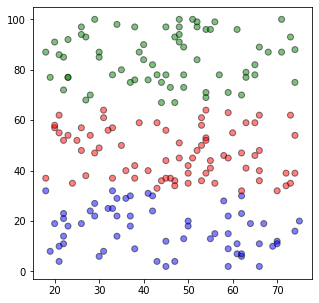

In [34]:

plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.show()

In [35]:
df = df[["CustomerAge","SpendingScore"]]
df.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [18]:
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(df)

KMeans(n_clusters=3)

In [19]:
labels = Kmeans.predict(df)
labels

array([2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0,
       0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0,
       1, 1], dtype=int32)

In [20]:
centroids = Kmeans.cluster_centers_
centroids

array([[47.06756757, 47.05405405],
       [44.37288136, 16.72881356],
       [44.82089552, 84.65671642]])

In [37]:
Kmeans.inertia_

7827.071198246201

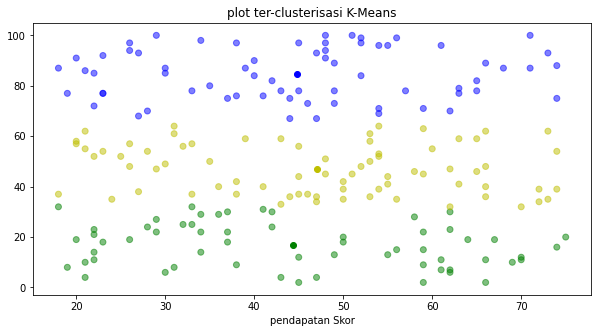

In [22]:
plt.figure(figsize=(10,5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['CustomerAge'], df['SpendingScore'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.xlabel('usia')
plt.xlabel('pendapatan Skor')
plt.title('plot ter-clusterisasi K-Means')
plt.show()


In [23]:
from numpy.lib.function_base import append
inertia_list = []
for num_clusters in np.arange(1, 21):
  Kmeans = KMeans(n_clusters=num_clusters)
  Kmeans.fit(df)
  inertia_list.append(Kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

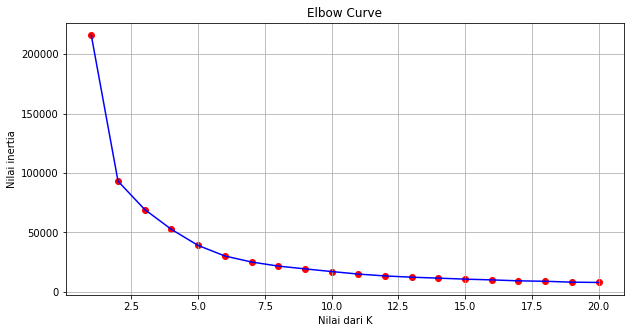

In [24]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,21), inertia_list,color='blue')
plt.scatter(np.arange(1,21), inertia_list,color='red')
plt.grid(True)
plt.xlabel('Nilai dari K')
plt.ylabel('Nilai inertia')
plt.title('Elbow Curve')
plt.show